## Preprocessing

In [18]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
#import tensorflow as tf
import seaborn as sns
#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.

application_df = application_df.drop(columns=['EIN', 'NAME'])
print(application_df)

      APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0                  T10       Independent          C1000    ProductDev   
1                   T3       Independent          C2000  Preservation   
2                   T5  CompanySponsored          C3000    ProductDev   
3                   T3  CompanySponsored          C2000  Preservation   
4                   T3       Independent          C1000     Heathcare   
...                ...               ...            ...           ...   
34294               T4       Independent          C1000    ProductDev   
34295               T4  CompanySponsored          C3000    ProductDev   
34296               T3  CompanySponsored          C2000  Preservation   
34297               T5       Independent          C3000    ProductDev   
34298               T3       Independent          C1000  Preservation   

       ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS   ASK_AMT  \
0       Association       1              0  

In [3]:
# Determine the number of unique values in each column.

unique_values_per_column = application_df.nunique()
print(unique_values_per_column)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [4]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
app_value_count = application_df['APPLICATION_TYPE'].value_counts()
app_value_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace = app_value_count[app_value_count<500].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
class_value_count = application_df['CLASSIFICATION'].value_counts()
class_value_count

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [13]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
class_value_count[class_value_count>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [7]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = class_value_count[class_value_count<1880].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
dummies_df = pd.get_dummies(application_df)
dummies_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
34295,1,5000,0,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
34296,1,5000,0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34297,1,5000,1,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [13]:
coor = dummies_df.corr().abs()
s = coor.unstack()
so = s.sort_values(kind="quicksort")
so[(so>=0.7)&(so<1)]

USE_CASE_Preservation         APPLICATION_TYPE_T3             0.801408
APPLICATION_TYPE_T3           USE_CASE_Preservation           0.801408
                              USE_CASE_ProductDev             0.835158
USE_CASE_ProductDev           APPLICATION_TYPE_T3             0.835158
USE_CASE_Preservation         USE_CASE_ProductDev             0.947137
USE_CASE_ProductDev           USE_CASE_Preservation           0.947137
ORGANIZATION_Association      ORGANIZATION_Trust              0.964377
ORGANIZATION_Trust            ORGANIZATION_Association        0.964377
AFFILIATION_Independent       AFFILIATION_CompanySponsored    0.993331
AFFILIATION_CompanySponsored  AFFILIATION_Independent         0.993331
dtype: float64

<Axes: >

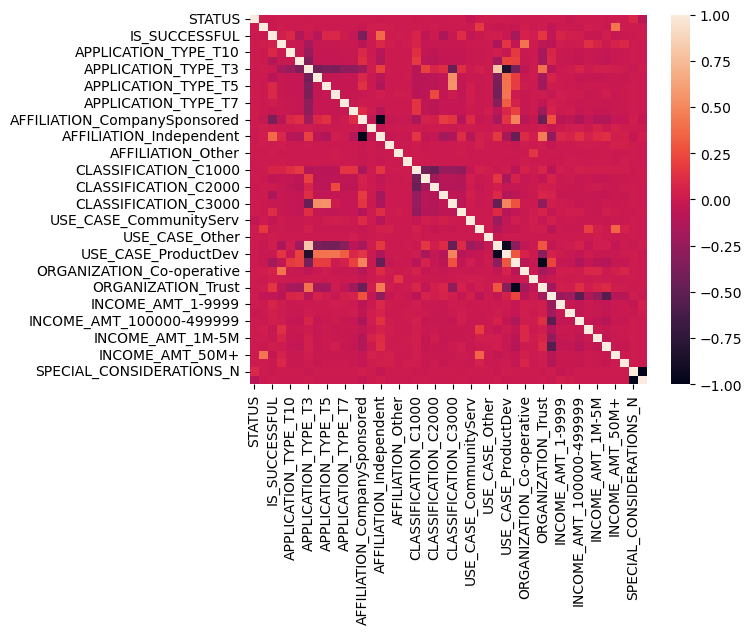

In [19]:
sns.heatmap(dummies_df.corr())


In [14]:
application_df["AFFILIATION"].value_counts()

AFFILIATION
Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: count, dtype: int64

In [15]:
application_df["ORGANIZATION"].value_counts()

ORGANIZATION
Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: count, dtype: int64

In [16]:
application_df["USE_CASE"].value_counts()

USE_CASE
Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: count, dtype: int64

In [17]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = dummies_df["IS_SUCCESSFUL"].values
X = dummies_df.drop("IS_SUCCESSFUL",axis=1).values
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE
input_features = len(X_train_scaled[0])
hidden_layer_1 = 80
hidden_layer_2 =30
nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_layer_1, activation="relu", input_dim=input_features))

# Second hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_layer_2, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5981 (23.36 KB)
Trainable params: 5981 (23.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# from keras.callbacks import Callback
# import os

# class WeightsSaver(Callback):

#     def __init__(self, weights_path, every_n_epochs=5):
#         self.weights_path = weights_path
#         self.every_n_epochs = every_n_epochs

#     def on_epoch_end(self, epoch, logs=None):
#         if (epoch + 1) % self.every_n_epochs == 0:
#             self.model.save_weights(os.path.join(self.weights_path, 'weights_{}.h5'.format(epoch)))

# weights_path = ''
# saver = WeightsSaver(weights_path, every_n_epochs=5)

# model.fit(X_train, y_train, callbacks=[saver])

In [23]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = "",
    save_freq="epoch", period = 5
   )

In [24]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[model_checkpoint_callback] )

Epoch 1/100
804/804 [==============================] - 6s 4ms/step - loss: 0.5700 - accuracy: 0.7230
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5557 - accuracy: 0.7299
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5518 - accuracy: 0.7309
Epoch 4/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5503 - accuracy: 0.7314
Epoch 5/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5491 - accuracy: 0.7320
Epoch 6/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5484 - accuracy: 0.7321
Epoch 7/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5474 - accuracy: 0.7340
Epoch 8/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5472 - accuracy: 0.7319
Epoch 9/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5463 - accuracy: 0.7335
Epoch 10/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5459 - accura

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5587 - accuracy: 0.7293 - 674ms/epoch - 3ms/step
Loss: 0.5587164163589478, Accuracy: 0.7293294668197632


In [26]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn.save("AlphabetSoupCharity.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
